# ML Assignment 1 – Statistical Measures and Hypothesis Testing

### Students Performance in Exams - Statistical Analysis
*Goal of this analysis :*  
1. To understand student's performance in exams by examining
descriptive statistics. 
2. Identifying and handling outliers, exploring distributions.
3. performing hypothesis testing.

In [3]:
# Import Required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# first step : open StudentsPerformance.csv file 
student = pd.read_csv(r'D:\Entri elevate coding\DSML assignments and home work\machine learning assignment and project\StudentsPerformance.csv')
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Analysis Steps:-
***1. Descriptive Statistics:***

In [12]:
# To view a summary of the dataset, including column names, data types, non-null counts, and memory usage .
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# Compute the following descriptive statistics for each of the score columns math
# score, reading score, and writing score:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
# ➢ find Mean , Median, Mode ,Minimum , Maximum , Standard Deviation for math score
math_score = [student['math score'].mean(), student['math score'].median(), student['math score'].mode()[0]]
print("Score Type :   Mean:Median:Mode  : ")
print('math score    :',math_score[0] , math_score[1] , math_score[2])

# ➢ find Mean , Median, Mode ,Minimum , Maximum , Standard Deviation for  reading score
reading_score = [student['reading score'].mean(), student['reading score'].median(), student['reading score'].mode()[0]]
print('reading score :',reading_score[0] , reading_score[1] , reading_score[2])

# ➢ find Mean , Median, Mode ,Minimum , Maximum , Standard Deviation for  writing score
writing_score = [student['writing score'].mean(), student['writing score'].median(), student['writing score'].mode()[0]]
print('writing score :',writing_score[0] , writing_score[1] , writing_score[2])


Score Type :   Mean:Median:Mode  : 
math score    : 66.089 66.0 65
reading score : 69.169 70.0 72
writing score : 68.054 69.0 74


## My observation :
1. Math Score:**Mean > Median > Mode**
      * Skewness > 0
      * Indicates a right-skewed distribution (most values are low with a few high values).

2. Reading Score: **Mean < Median < Mode**
      * Skewness < 0
      * Indicates a left-skewed distribution (most values are high with a few low values).

3. Writing Score:**Mean < Median < Mode**
      * Skewness < 0
      * Indicates a left-skewed distribution (similar pattern as Reading scores).

# 2. Identify and Handle Outliers:

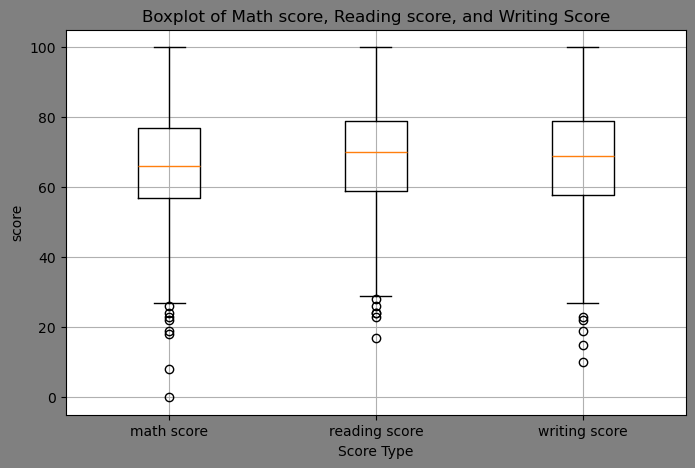

In [38]:
# 2.1. Use boxplots to visually identify outliers in the math score, reading score,and writing score columns.
plt.figure(figsize = (8,5), facecolor = 'grey')
plt.boxplot([student['math score'],student['reading score'],student['writing score']],labels = ['math score','reading score','writing score'])
plt.title('Boxplot of Math score, Reading score, and Writing Score')
plt.ylabel('score')
plt.grid(True)
plt.xlabel('Score Type')
plt.show()

In [41]:
#2.2. Calculate the Interquartile Range (IQR) for each of these score columns.
# find math score column percentile ie Q1_M ,Q3_M
Q1_M = np.percentile(student['math score'], 25)
Q3_M = np.percentile(student['math score'], 75)

# find IQR for math score
IQR_M = Q3_M - Q1_M
print("IQR for math score:", IQR_M)

# find writing score column percentile ie Q1_W ,Q3_W
Q1_W = np.percentile(student['writing score'], 25)
Q3_W = np.percentile(student['writing score'], 75)

# find IQR for writing  score column
IQR_W = Q3_W - Q1_W
print("IQR for writing score:", IQR_W)

# find Reading score column percentile ie Q1_R ,Q3_R
Q1_R = np.percentile(student['reading score'], 25)
Q3_R = np.percentile(student['reading score'], 75)

# find IQR for reading score
IQR_R = Q3_R - Q1_R
print("IQR for reading score:", IQR_R)

IQR for math score: 20.0
IQR for writing score: 21.25
IQR for reading score: 20.0


In [43]:
#2.3. Determine the lower and upper bounds for outliers using the IQR method.
# detecting outlier for math score
lower_bound_M = Q1_M - 1.5 * IQR_M
upper_bound_M = Q3_M + 1.5 * IQR_M
outliers_M = student[(student['math score'] < lower_bound_M) | (student['math score'] > upper_bound_M)]
print("Outliers for math score:")
outliers_M

Outliers for math score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [45]:
# detecting outlier for Reading score  column
lower_bound_R = Q1_R - 1.5 * IQR_R
upper_bound_R = Q3_R + 1.5 * IQR_R
outliers_R = student[(student['reading score'] < lower_bound_R) | (student['reading score'] > upper_bound_R)]
print("Outliers for reading score:")
outliers_R

Outliers for reading score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [47]:
# detecting outlier for writing score  column
lower_bound_W = Q1_W - 1.5 * IQR_W
upper_bound_W = Q3_W + 1.5 * IQR_W
outliers_W = student[(student['writing score'] < lower_bound_W) | (student['writing score'] > upper_bound_W)]
print("Outliers for writing score:")
outliers_W

Outliers for writing score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [49]:
#2.4. Handle the outliers by removing them from the dataset.
student_cleaned_m = student[(student['math score'] >= lower_bound_M) & (student['math score'] <= upper_bound_M)]
student_cleaned_R = student_cleaned_m[(student_cleaned_m['reading score'] >= lower_bound_R) & (student_cleaned_m['reading score'] <= upper_bound_R)]
student_cleaned = student_cleaned_R[(student_cleaned_R['writing score'] >= lower_bound_W) & (student_cleaned_R['writing score'] <= upper_bound_W)]
student_cleaned

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


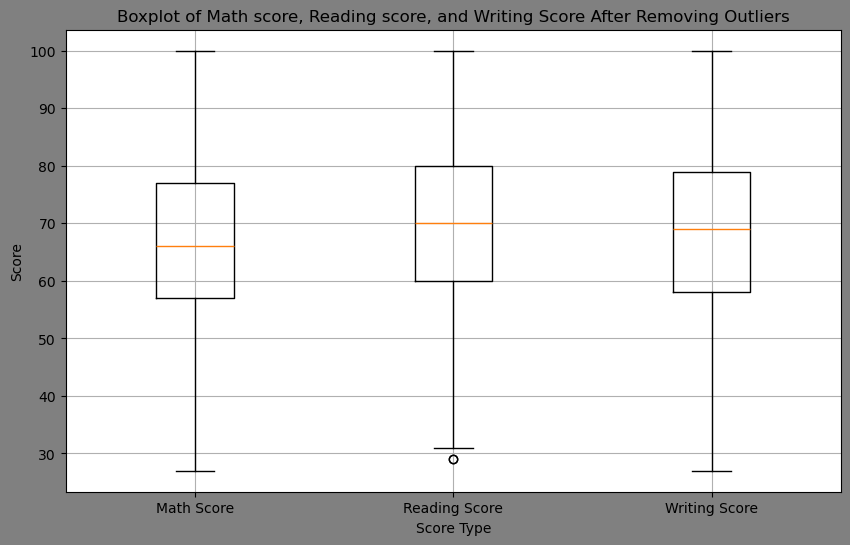

In [51]:
plt.figure(figsize=(10, 6),facecolor='grey')
plt.boxplot([student_cleaned['math score'], student_cleaned['reading score'], student_cleaned['writing score']],
            labels=['Math Score', 'Reading Score', 'Writing Score'])
plt.title('Boxplot of Math score, Reading score, and Writing Score After Removing Outliers')
plt.grid(True)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()

# **3. Check Distribution and Skewness:**

Histogram of Math Score:


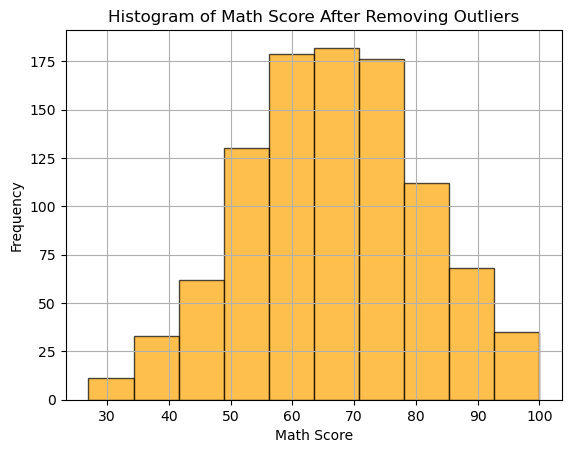

Histogram of Reading Score:


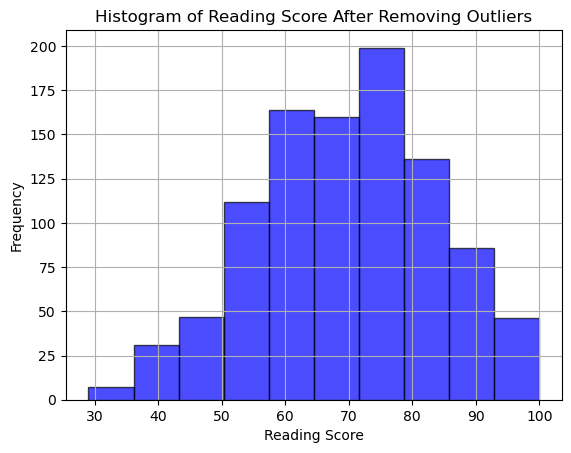

Histogram of Writing Score:


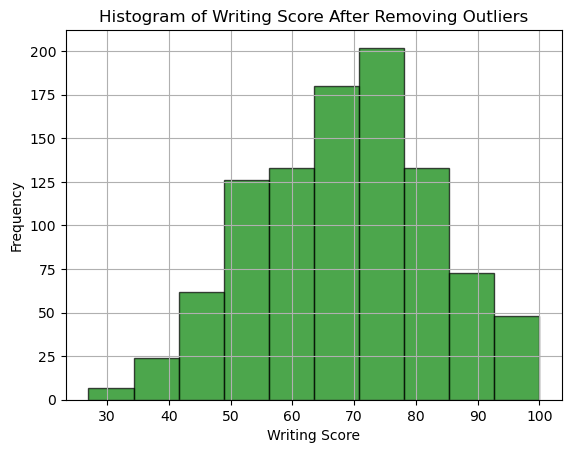

In [56]:
# 3.1. Plot histograms and/or density plots for math score, reading score, and
# writing score to visualize their distributions.
print("Histogram of Math Score:")
plt.hist(student_cleaned['math score'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Score After Removing Outliers')
plt.grid(True)
plt.show()

print("Histogram of Reading Score:")
plt.hist(student_cleaned['reading score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Histogram of Reading Score After Removing Outliers')
plt.grid(True)
plt.show()

print("Histogram of Writing Score:")
plt.hist(student_cleaned['writing score'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Histogram of Writing Score After Removing Outliers')
plt.grid(True)
plt.show()

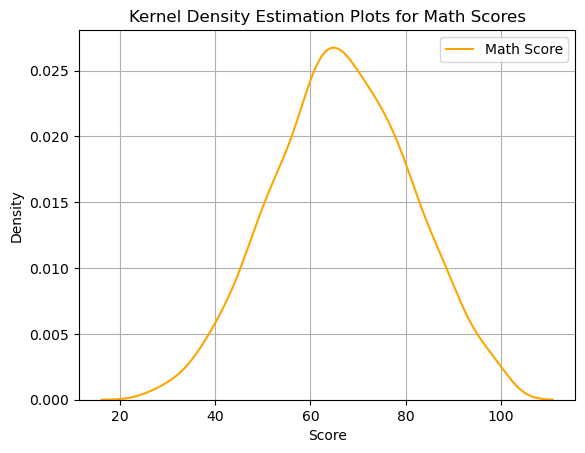

In [58]:
sns.kdeplot(student_cleaned['math score'], color='orange', label='Math Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plots for Math Scores')
plt.legend()
plt.grid(True)
plt.show()

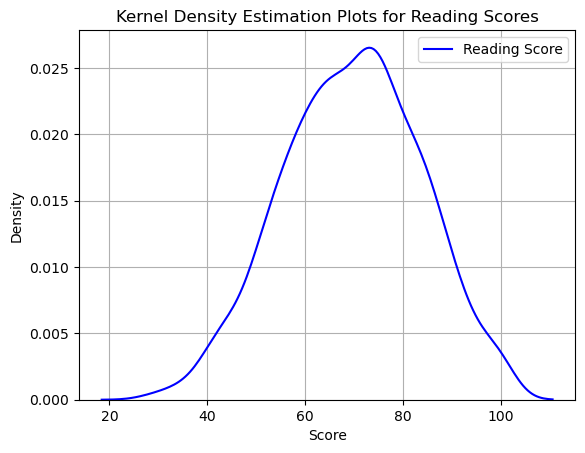

In [60]:
sns.kdeplot(student_cleaned['reading score'], color='blue', label='Reading Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plots for Reading Scores')
plt.legend()
plt.grid(True)
plt.show()

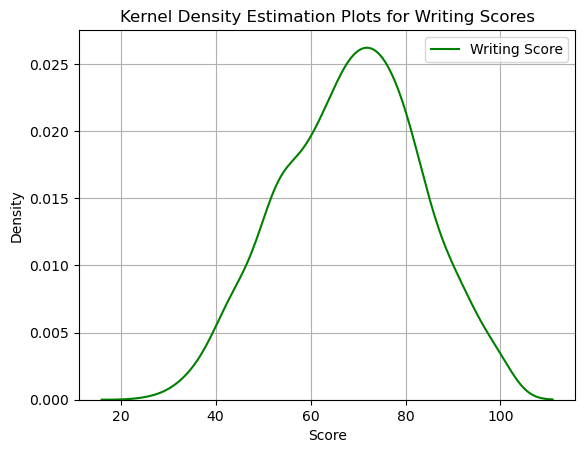

In [62]:
sns.kdeplot(student_cleaned['writing score'], color='green', label='Writing Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plots for Writing Scores')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# 3.2. Calculate and interpret the skewness for each of these score columns.
math_skew= student_cleaned['math score'].skew()
reading_skew= student_cleaned['reading score'].skew()
writing_skew= student_cleaned['writing score'].skew()
print("Skewness for Math Score:", math_skew)
print("Skewness for Reading Score:", reading_skew)
print("Skewness for Writing Score:", writing_skew)

Skewness for Math Score: -0.03909973819632616
Skewness for Reading Score: -0.1078812813873009
Skewness for Writing Score: -0.10873128839119586


# 3.3. Discuss whether the distributions are skewed to the left or right and suggest any appropriate transformations if needed to address skewness.
## My observation
Based on the skewness values for Math Score (-0.0391), Reading Score (-0.1079), and Writing Score (-0.1087), all fall within the range of -0.5 to 0.5, indicating no skew or very mild skew. Therefore, the distributions are approximately symmetric, and no transformations are needed to address skewness.s.

# Label Encoding
If the columns contains categorical values, it's often necessary to encode these categorical values into numerical format before performing statistical tests. ***from sklearn.preprocessing*** to convert categorical values into numbers.

In [78]:
# import label encoding from scikit learn library
from sklearn.preprocessing import LabelEncoder

# initiate label encoding object
label_encoder = LabelEncoder()

# create a new copy for student_cleaned dataframe
student_encoded = student_cleaned.copy()

# apply label encoding to the dataframe and convert only non numeric columns
for column in student_encoded.select_dtypes(include=['object']):
    student_encoded[column] = label_encoder.fit_transform(student_encoded[column])

# print the encoded dataframe
student_encoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [80]:
# After label encoding , categorical values change to numerical values 
student_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       988 non-null    int32
 1   race/ethnicity               988 non-null    int32
 2   parental level of education  988 non-null    int32
 3   lunch                        988 non-null    int32
 4   test preparation course      988 non-null    int32
 5   math score                   988 non-null    int64
 6   reading score                988 non-null    int64
 7   writing score                988 non-null    int64
dtypes: int32(5), int64(3)
memory usage: 50.2 KB


In [82]:
# for our understanding get unique values of all categorical columns
for column in student_encoded.columns[:-3]:
   print(column,student[column].unique(), student_encoded[column].unique(),sep=': ')

gender: ['female' 'male']: [0 1]
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']: [1 2 0 3 4]
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']: [1 4 3 0 2 5]
lunch: ['standard' 'free/reduced']: [1 0]
test preparation course: ['none' 'completed']: [1 0]


In [91]:
# before hypothesis testing we need to preserve our dataframe 
student_encoded.to_csv(r'D:\Entri elevate coding\DSML assignments and home work\machine learning assignment and project\student_encoded.csv', index=False)
print("Results saved to student_encoded.csv")


Results saved to student_encoded.csv


# 4. Hypothesis Testing:

In [93]:
# 4.1. Formulate Hypotheses:
# ➢ State the null and alternative hypotheses to test whether the mean math score differs between students who completed the test preparation course and those who did not.
h0 = "There is no difference in the mean math scores between students who completed the test preparation course and those who did not."
h1= "There is a difference in the mean math scores between students who completed the test preparation course and those who did not."
print("Null Hypothesis (H0):", h0)
print("Alternative Hypothesis (H1):", h1)

Null Hypothesis (H0): There is no difference in the mean math scores between students who completed the test preparation course and those who did not.
Alternative Hypothesis (H1): There is a difference in the mean math scores between students who completed the test preparation course and those who did not.


In [95]:
# 4.2. Significance Level:
# ➢ Specify the significance level (α - alpha) you will use for the hypothesis test. Common choice is α = 0.05.
alpha = 0.05
print("Significance Level (α):", alpha)

Significance Level (α): 0.05


# 4.3. t-test Test Statistic & p-value:

In [98]:
# import scipy stats for statistics
import scipy.stats as stats

# ➢ Perform a t-test to compare the means of the two groups.
from scipy.stats import ttest_ind


test_attended = student_encoded[student_encoded['test preparation course'] == 1]['math score']
test_not_attended = student_encoded[student_encoded['test preparation course'] == 0]['math score']

# ➢ Calculate the test statistic and p-value.
t_statistic, p_value = ttest_ind(test_attended, test_not_attended,equal_var=False)
test_attended_mean = test_attended.mean()
test_not_attended_mean = test_not_attended.mean()
print("Test Attended Mean:", test_attended_mean)
print("Test Not Attended Mean:", test_not_attended_mean)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# ➢ Provide the results and interpret them in the context of the hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean math scores between students who completed the test preparation course and those who did not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean math scores between students who completed the test preparation course and those who did not.")


Test Attended Mean: 64.81458003169573
Test Not Attended Mean: 69.82633053221288
t-statistic: -5.318069373254168
p-value: 1.3922089617084596e-07
Reject the null hypothesis. There is a significant difference in the mean math scores between students who completed the test preparation course and those who did not.


# 4.4. Decision:
## ➢ Based on the p-value or the t-statistic, decide whether to reject or fail to reject the null hypothesis.
### Answer :
* The p-value is 1.3922089617084596e-07 and t-statistic is -5.318069373254168, which is much smaller than the significance level of 0.05.
* Therefore, we reject the null hypothesis.
* This indicates a significant difference between the mean math scores of students who attended the test preparation course and those who did not. The negative t-statistic (-5.318069373254168) shows that students who did not attend the course scored higher on average than those who attended.

## ➢ Discuss the implications of your decision in relation to the context of the problem.
### Answer :
**Implications**:

* Students who didn't attend the course scored higher on average.
* This suggests the course might not be effective and needs improvement or alternatives to help students perform better.

**Conclusion:**

* Institutions should re-evaluate the course's content and effectiveness to better support students in achieving higher scores.
